<a href="https://colab.research.google.com/github/RomeoDakurah/Loan-application-project/blob/main/Loan_Applications_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Data Processing

In [ ]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
def process_data(df):

    label_encoders = {}
    for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    X = df[['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
    y = df['Loan_Status']

    return X, y, label_encoders

In [ ]:
df = pd.read_csv('loan.csv').dropna()
X, y, encoders = process_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

def logistic_regression(X, y, cv_folds=5):
    params = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'max_iter': [1000, 2000]
    }

    model = LogisticRegression()
    grid = GridSearchCV(estimator=model, param_grid=params,
                        cv=cv_folds, scoring='accuracy')

    grid.fit(X, y)
    best_params = grid.best_params_
    best_model = grid.best_estimator_

    return best_model, best_params

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }

    grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_rf = grid.best_estimator_

    return best_rf, grid.best_params_

# MLP (Neural Net)

In [ ]:
from sklearn.neural_network import MLPClassifier

def train_mlp(X_train, y_train):
    mlp = MLPClassifier(random_state=42, max_iter=500)

    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (100, 100)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive'],
    }

    grid = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_mlp = grid.best_estimator_
    best_params = grid.best_params_

    return best_mlp, best_params

# Predict

In [ ]:
lg_model, lg_params = logistic_regression(X_train, y_train)
y_pred_lg = lg_model.predict(X_test)

rf, rf_params = train_random_forest(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mlp, mlp_params = train_mlp(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred, name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Precision: {precision}")
    print(f"{name} Recall: {recall}")
    print(f"{name} F1 Score: {f1}\n")

evaluate_model(y_test, y_pred_lg, 'logistic regression')
evaluate_model(y_test, y_pred_rf, 'random forest')
evaluate_model(y_test, y_pred_mlp, 'mlp')

logistic regression Accuracy: 0.8229166666666666
logistic regression Precision: 0.8
logistic regression Recall: 1.0
logistic regression F1 Score: 0.8888888888888888

random forest Accuracy: 0.8229166666666666
random forest Precision: 0.8148148148148148
random forest Recall: 0.9705882352941176
random forest F1 Score: 0.8859060402684564

mlp Accuracy: 0.6979166666666666
mlp Precision: 0.7142857142857143
mlp Recall: 0.9558823529411765
mlp F1 Score: 0.8176100628930818



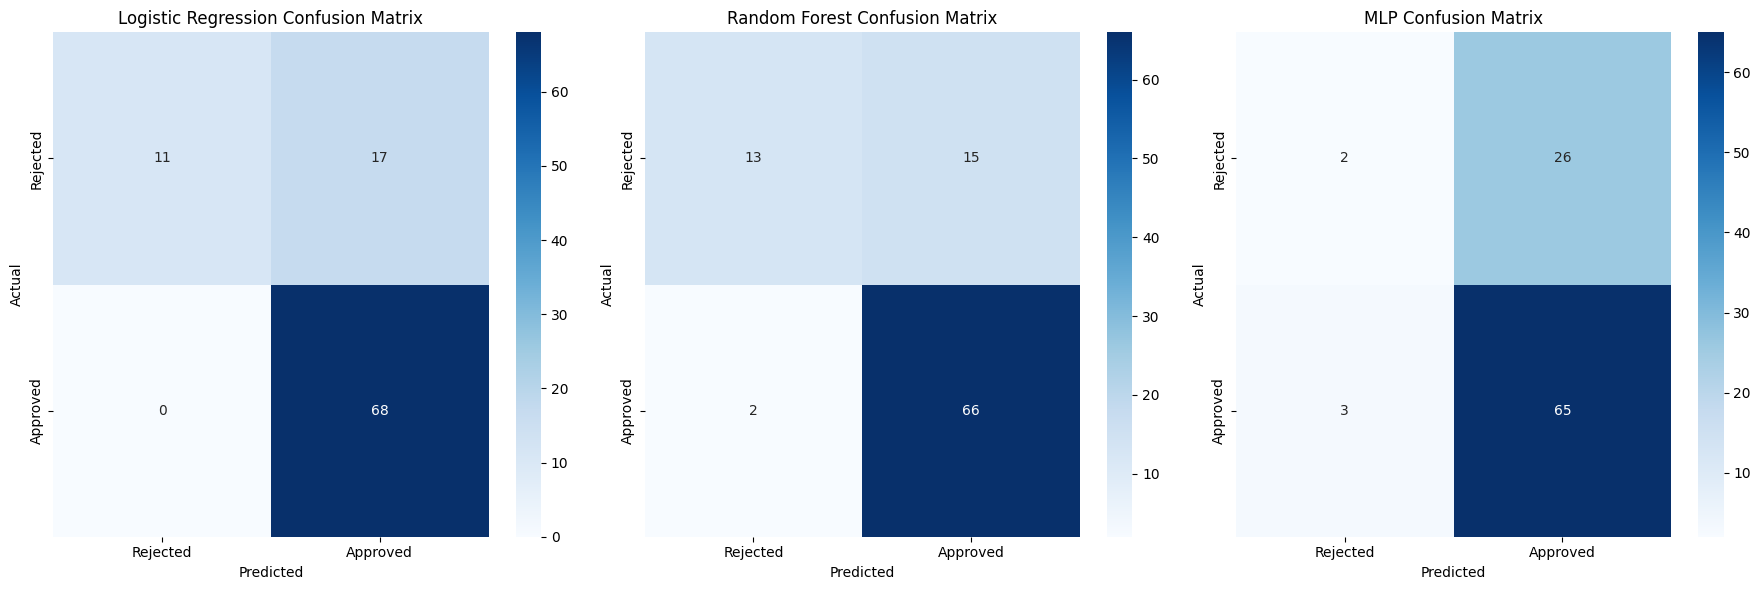

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_log_reg = confusion_matrix(y_test, y_pred_lg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'], ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'], ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'], ax=axes[2])
axes[2].set_title('MLP Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()